# Data Explore

In [1]:
import os
import ee
import geemap.core as geemap
import pandas as pd
import geopandas as gpd
import urllib.request

from IPython.display import Image

In [2]:
from libs.ee import initialize_ee

ee = initialize_ee(get_ipython())

from libs.s2cloudless import S2Cloudless
from libs.sentinel import mask_s2_clouds, get_sentinel_image_thumbnail

# Load data

In [3]:
directory = 'data/NZ_landslide_inventory/'
auckland_filepath = f'{directory}/cleaned_auckland.gpkg'
gdf = gpd.read_file(auckland_filepath, layer='landslides')
gdf = gdf[gdf['dateoccurence'].notnull()]
gdf.head()

,GlobalID,latitude,longitude,region,dateoccurence,closestdate,geometry
0,cb20f8d7-abeb-4ce5-bafa-a75c01b03136,-36.931306,174.701880,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.70188 -36.93131)
1,9da581bc-ff20-454f-b6fb-721279cd347a,-36.924269,174.705747,Auckland Region,2023-01-30 23:00:00,2023-01-30 23:00:00,POINT (174.70575 -36.92427)
2,2a361da4-7adf-4f4d-b94c-f3cf9ccccc46,-36.867368,174.738318,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.73832 -36.86737)
3,4470b30b-6c80-46be-b0f7-e4ec0a5d72fd,-36.861593,174.655298,Auckland Region,2023-02-13 23:00:00,2023-02-13 23:00:00,POINT (174.6553 -36.86159)
4,cfcff56a-7cc6-41f5-9e7e-8da0daa5dbde,-36.817738,174.728127,Auckland Region,2023-01-31 23:00:00,2023-01-31 23:00:00,POINT (174.72813 -36.81774)


In [4]:
idx = 0
event = gdf.iloc[idx]
point = event.geometry.centroid
points = gdf.geometry.centroid
start_date = gdf['dateoccurence'].min().date().strftime("%Y-%m-%d")
end_date = ( gdf['dateoccurence'].min().date() + pd.Timedelta(days=91)).strftime("%Y-%m-%d")
point = ee.Geometry.Point(point.x, point.y)

In [5]:
start_date, end_date

('2022-02-01', '2022-05-03')

## Quick preview on map

In [6]:
dataset = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterDate(start_date, end_date)
    # Pre-filter to get less cloudy granules.
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))
    .map(mask_s2_clouds)
)

visualization = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],
}

In [7]:
# Convert GeoSeries to a list of ee.Geometry.Point
ee_points = [ee.Geometry.Point([p.x, p.y]) for p in points]

# Create an ee.FeatureCollection from the points
ee_features = [ee.Feature(p) for p in ee_points]
ee_feature_collection = ee.FeatureCollection(ee_features)

In [8]:
# m = geemap.Map()
# m.set_center(point.coordinates().get(0).getInfo(), point.coordinates().get(1).getInfo(), 15)
# m.add_layer(dataset.min(), visualization, 'RGB')
# m.add_layer(point, {'color': 'red'}, 'My Pinpoint')
# # Add the FeatureCollection to the map
# m.addLayer(ee_feature_collection, {'color': 'red'}, 'Landslide Points')

# m

## Cloud removal

In [9]:
s2cloudless = S2Cloudless(ee)
# point = points[0]
aoi = ee.Geometry.Point(point.coordinates().get(0).getInfo(), point.coordinates().get(1).getInfo()).buffer(1000)
# start_date
# end_date,
buffer=50
cloud_filter=60

In [10]:
# s2_sr_cld_col_eval = s2cloudless._get_s2_sr_cld_col(aoi, start_date, end_date, cloud_filter)
# # As ever, a good idea to do a quick viusalization check
# Map = geemap.Map()
# Map.centerObject(aoi, 12)
# Map.addLayer(s2_sr_cld_col_eval, {'bands':['B4','B3','B2'], 'min':0, 'max':3000}, 'S2 collection (before)')
# Map.addLayer(point, {'color': 'red'}, 'My Pinpoint')
# Map

In [11]:
# m_cloud = s2cloudless.cloud_layers_map(aoi, start_date, end_date, buffer=buffer, cloud_filter=cloud_filter)
# m_cloud.addLayer(point, {'color': 'red'}, 'My Pinpoint')
# m_cloud

In [12]:
m_cloud_free = s2cloudless.cloud_free_map(aoi, start_date, end_date, buffer=buffer, cloud_filter=cloud_filter)
m_cloud_free.addLayer(point, {'color': 'red'}, 'My Pinpoint')
m_cloud_free

Map(center=[-36.93130544085776, 174.7018805231759], controls=(WidgetControl(options=['position', 'transparent_…

'Filename ./data/2-data-explore-events/rgb/0_174.701880487593_-36.931306466746_2023-02-14_2023-04-15.png'

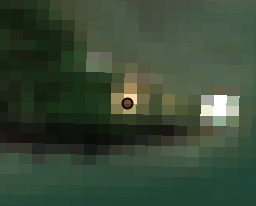

'Filename ./data/2-data-explore-events/rgb/1_174.70574721288_-36.9242685339089_2023-01-31_2023-04-01.png'

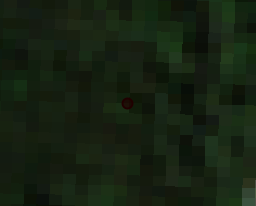

'Filename ./data/2-data-explore-events/rgb/2_174.738317563251_-36.8673683761872_2023-02-01_2023-04-02.png'

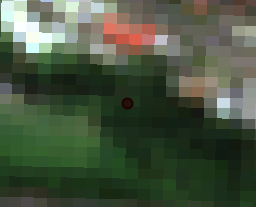

'Filename ./data/2-data-explore-events/rgb/3_174.655298082793_-36.8615929062174_2023-02-14_2023-04-15.png'

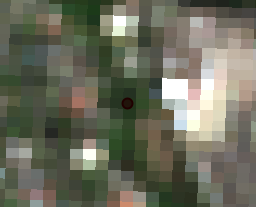

'Filename ./data/2-data-explore-events/rgb/4_174.728126662222_-36.8177384118568_2023-02-01_2023-04-02.png'

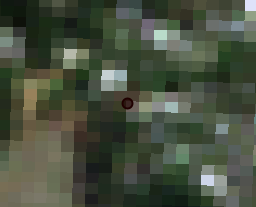

'Filename ./data/2-data-explore-events/rgb/5_174.767440064505_-36.9257813698387_2023-02-01_2023-04-02.png'

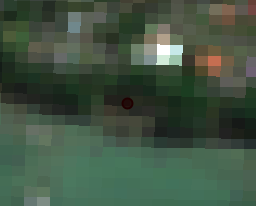

'Filename ./data/2-data-explore-events/rgb/6_174.702992745634_-36.927593097499_2023-02-14_2023-04-15.png'

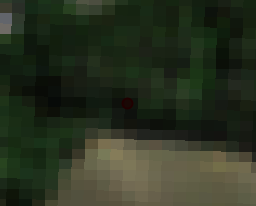

'Filename ./data/2-data-explore-events/rgb/7_174.653319614685_-37.0943919015828_2023-02-01_2023-04-02.png'

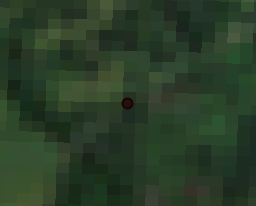

'Filename ./data/2-data-explore-events/rgb/8_174.746297568181_-36.8198594698531_2023-01-27_2023-03-28.png'

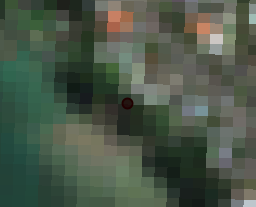

'Filename ./data/2-data-explore-events/rgb/9_174.716829737716_-36.9256941844427_2023-01-28_2023-03-29.png'

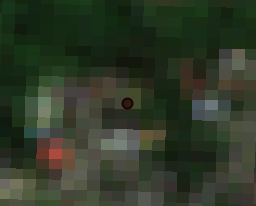

In [16]:
out_dir = './data/2-data-explore-events/'
start_date_offset = 1
end_date_offset = 61 # s2 revisit time is 5 days, make sure we have images before the event

for idx, event in gdf[:10].iterrows():
    filepath_rgb, filepath_with_marker = get_sentinel_image_thumbnail(
        ee,
        s2cloudless,
        event,
        idx,
        out_dir,
        start_date_offset=start_date_offset,
        end_date_offset=end_date_offset,
        buffer=buffer,
        cloud_filter=cloud_filter,
    )

    display(f"Filename {filepath_rgb}")
    display(Image(filename=filepath_with_marker))